In [2]:
from preprocessing import *
import preprocessing as prp
import pandas as pd
import torch
import torch.nn as nn
import torch.utils.data as data_utils
from usad import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
dataframe = pd.read_csv(r"/home/medoro/Unsupervised_Anomaly_Detection_thesis/data/train.csv")
dataframe.shape

(1749494, 57)

In [4]:
df=dataframe[['building_id','primary_use', 'timestamp', 'meter_reading', 'sea_level_pressure', 'is_holiday','anomaly']]
df

building_id                    primary_use            timestamp  \
0                  1                      Education  2016-01-01 00:00:00   
1                 32                         Office  2016-01-01 00:00:00   
2                 41                         Office  2016-01-01 00:00:00   
3                 55                         Office  2016-01-01 00:00:00   
4                 69                        Parking  2016-01-01 00:00:00   
...              ...                            ...                  ...   
1749489         1316  Entertainment/public assembly  2016-12-31 23:00:00   
1749490         1318  Entertainment/public assembly  2016-12-31 23:00:00   
1749491         1319  Entertainment/public assembly  2016-12-31 23:00:00   
1749492         1323                         Office  2016-12-31 23:00:00   
1749493         1353              Religious worship  2016-12-31 23:00:00   

         meter_reading  sea_level_pressure  is_holiday  anomaly  
0                  NaN               967.2           1        0  
1                  NaN               967.2           1        0  
2                  NaN               967.2           1        0  
3                  NaN               967.2           1        0  
4                  NaN               967.2           1        0  
...                ...                 ...         ...      ...  
1749489         38.844               967.2           0        0  
1749490        202.893               967.2           0        0  
1749491            NaN               967.2           0        0  
1749492        172.000               967.2           0        0  
1749493          2.400               967.2           0        0  

[1749494 rows x 7 columns]

In [5]:
imputed_df = impute_nulls(df)
imputed_df

building_id        primary_use            timestamp  meter_reading  \
0                  1          Education  2016-01-01 00:00:00      31.477940   
200                1          Education  2016-01-01 01:00:00      29.582970   
398                1          Education  2016-01-01 02:00:00      28.635485   
597                1          Education  2016-01-01 03:00:00      28.161742   
796                1          Education  2016-01-01 04:00:00      27.924871   
...              ...                ...                  ...            ...   
1748693         1353  Religious worship  2016-12-31 19:00:00       2.425000   
1748893         1353  Religious worship  2016-12-31 20:00:00       2.450000   
1749093         1353  Religious worship  2016-12-31 21:00:00       2.425000   
1749293         1353  Religious worship  2016-12-31 22:00:00       2.450000   
1749493         1353  Religious worship  2016-12-31 23:00:00       2.400000   

         sea_level_pressure  is_holiday  anomaly  
0                     967.2           1        0  
200                  1019.4           1        0  
398                  1018.8           1        0  
597                  1018.1           1        0  
796                  1019.0           1        0  
...                     ...         ...      ...  
1748693               967.2           0        0  
1748893               967.2           0        0  
1749093               967.2           0        0  
1749293               967.2           0        0  
1749493               967.2           0        0  

[1749494 rows x 7 columns]

Now that we have imputed the missing values for the column containing the energy consumption measurements, we can procees by adding a couple of features more and further imputing the missing dates for each timeseries in the dataset.

In [6]:
df = add_trigonometric_features(imputed_df)
df

building_id        primary_use           timestamp  meter_reading  \
0                  1          Education 2016-01-01 00:00:00      31.477940   
200                1          Education 2016-01-01 01:00:00      29.582970   
398                1          Education 2016-01-01 02:00:00      28.635485   
597                1          Education 2016-01-01 03:00:00      28.161742   
796                1          Education 2016-01-01 04:00:00      27.924871   
...              ...                ...                 ...            ...   
1748693         1353  Religious worship 2016-12-31 19:00:00       2.425000   
1748893         1353  Religious worship 2016-12-31 20:00:00       2.450000   
1749093         1353  Religious worship 2016-12-31 21:00:00       2.425000   
1749293         1353  Religious worship 2016-12-31 22:00:00       2.450000   
1749493         1353  Religious worship 2016-12-31 23:00:00       2.400000   

         sea_level_pressure  is_holiday  anomaly  weekday  weekday_y  \
0                     967.2           1        0        4  -0.433884   
200                  1019.4           1        0        4  -0.433884   
398                  1018.8           1        0        4  -0.433884   
597                  1018.1           1        0        4  -0.433884   
796                  1019.0           1        0        4  -0.433884   
...                     ...         ...      ...      ...        ...   
1748693               967.2           0        0        5  -0.974928   
1748893               967.2           0        0        5  -0.974928   
1749093               967.2           0        0        5  -0.974928   
1749293               967.2           0        0        5  -0.974928   
1749493               967.2           0        0        5  -0.974928   

         weekday_x  
0        -0.900969  
200      -0.900969  
398      -0.900969  
597      -0.900969  
796      -0.900969  
...            ...  
1748693  -0.222521  
1748893  -0.222521  
1749093  -0.222521  
1749293  -0.222521  
1749493  -0.222521  

[1749494 rows x 10 columns]

In [7]:
dfs_dict = impute_missing_dates(df)

/home/medoro/Unsupervised_Anomaly_Detection_thesis/preprocessing.py:78: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_index = pd.date_range(start_ts, end=end_ts, freq="1H")


In [7]:
dfs_dict

{1:                      building_id primary_use  meter_reading  \
 2016-01-01 00:00:00            1   Education      31.477940   
 2016-01-01 01:00:00            1   Education      29.582970   
 2016-01-01 02:00:00            1   Education      28.635485   
 2016-01-01 03:00:00            1   Education      28.161742   
 2016-01-01 04:00:00            1   Education      27.924871   
 ...                          ...         ...            ...   
 2016-12-31 19:00:00            1   Education      20.006000   
 2016-12-31 20:00:00            1   Education      15.364000   
 2016-12-31 21:00:00            1   Education      15.685000   
 2016-12-31 22:00:00            1   Education      15.925000   
 2016-12-31 23:00:00            1   Education      14.964000   
 
                      sea_level_pressure  is_holiday  anomaly  weekday  \
 2016-01-01 00:00:00               967.2           1        0        4   
 2016-01-01 01:00:00              1019.4           1        0        4   
 2016

In [8]:
df1 = pd.concat(dfs_dict.values())
df1

building_id        primary_use  meter_reading  \
2016-01-01 00:00:00            1          Education      31.477940   
2016-01-01 01:00:00            1          Education      29.582970   
2016-01-01 02:00:00            1          Education      28.635485   
2016-01-01 03:00:00            1          Education      28.161742   
2016-01-01 04:00:00            1          Education      27.924871   
...                          ...                ...            ...   
2016-12-31 19:00:00         1353  Religious worship       2.425000   
2016-12-31 20:00:00         1353  Religious worship       2.450000   
2016-12-31 21:00:00         1353  Religious worship       2.425000   
2016-12-31 22:00:00         1353  Religious worship       2.450000   
2016-12-31 23:00:00         1353  Religious worship       2.400000   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00               967.2           1        0        4   
2016-01-01 01:00:00              1019.4           1        0        4   
2016-01-01 02:00:00              1018.8           1        0        4   
2016-01-01 03:00:00              1018.1           1        0        4   
2016-01-01 04:00:00              1019.0           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[1756800 rows x 9 columns]

Let's now obtain the train and validation set. We are going to split the dataset into 2 sets, according to the building id.

In [9]:
#dfs_train, dfs_val = train_val_split(df1)
#train = pd.concat(dfs_train.values())

In [10]:
#val = pd.concat(dfs_val.values())

In [9]:
dfs_train, dfs_val, dfs_test = train_val_test_split(df1)
train = pd.concat(dfs_train.values())

In [10]:
val = pd.concat(dfs_val.values())

In [11]:
test = pd.concat(dfs_test.values())

In [12]:
train

building_id primary_use  meter_reading  \
2016-01-01 00:00:00            1   Education      31.477940   
2016-01-01 01:00:00            1   Education      29.582970   
2016-01-01 02:00:00            1   Education      28.635485   
2016-01-01 03:00:00            1   Education      28.161742   
2016-01-01 04:00:00            1   Education      27.924871   
...                          ...         ...            ...   
2016-12-31 19:00:00         1238      Office      54.900000   
2016-12-31 20:00:00         1238      Office      56.000000   
2016-12-31 21:00:00         1238      Office      66.400000   
2016-12-31 22:00:00         1238      Office      67.100000   
2016-12-31 23:00:00         1238      Office      71.400000   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00               967.2           1        0        4   
2016-01-01 01:00:00              1019.4           1        0        4   
2016-01-01 02:00:00              1018.8           1        0        4   
2016-01-01 03:00:00              1018.1           1        0        4   
2016-01-01 04:00:00              1019.0           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[1133136 rows x 9 columns]

In [15]:
val

building_id        primary_use  meter_reading  \
2016-01-01 00:00:00         1241         Healthcare        234.180   
2016-01-01 01:00:00         1241         Healthcare        294.156   
2016-01-01 02:00:00         1241         Healthcare        354.152   
2016-01-01 03:00:00         1241         Healthcare        294.121   
2016-01-01 04:00:00         1241         Healthcare        294.102   
...                          ...                ...            ...   
2016-12-31 19:00:00         1353  Religious worship          2.425   
2016-12-31 20:00:00         1353  Religious worship          2.450   
2016-12-31 21:00:00         1353  Religious worship          2.425   
2016-12-31 22:00:00         1353  Religious worship          2.450   
2016-12-31 23:00:00         1353  Religious worship          2.400   

                     sea_level_pressure  is_holiday  anomaly  weekday  \
2016-01-01 00:00:00              1018.9           1        0        4   
2016-01-01 01:00:00              1018.4           1        0        4   
2016-01-01 02:00:00              1018.2           1        0        4   
2016-01-01 03:00:00              1018.3           1        0        4   
2016-01-01 04:00:00              1018.2           1        0        4   
...                                 ...         ...      ...      ...   
2016-12-31 19:00:00               967.2           0        0        5   
2016-12-31 20:00:00               967.2           0        0        5   
2016-12-31 21:00:00               967.2           0        0        5   
2016-12-31 22:00:00               967.2           0        0        5   
2016-12-31 23:00:00               967.2           0        0        5   

                     weekday_y  weekday_x  
2016-01-01 00:00:00  -0.433884  -0.900969  
2016-01-01 01:00:00  -0.433884  -0.900969  
2016-01-01 02:00:00  -0.433884  -0.900969  
2016-01-01 03:00:00  -0.433884  -0.900969  
2016-01-01 04:00:00  -0.433884  -0.900969  
...                        ...        ...  
2016-12-31 19:00:00  -0.974928  -0.222521  
2016-12-31 20:00:00  -0.974928  -0.222521  
2016-12-31 21:00:00  -0.974928  -0.222521  
2016-12-31 22:00:00  -0.974928  -0.222521  
2016-12-31 23:00:00  -0.974928  -0.222521  

[289872 rows x 9 columns]

In [16]:
test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00      19.232375               967.2           1        0   
2016-01-01 01:00:00      13.457187              1019.4           1        0   
2016-01-01 02:00:00      10.569594              1018.8           1        0   
2016-01-01 03:00:00       9.125797              1018.1           1        0   
2016-01-01 04:00:00       8.403898              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00     132.040616               967.2           0        0   
2016-12-31 20:00:00     132.040616               967.2           0        0   
2016-12-31 21:00:00     132.040616               967.2           0        0   
2016-12-31 22:00:00     132.040616               967.2           0        0   
2016-12-31 23:00:00     132.040616               967.2           0        0   

                     weekday  weekday_y  weekday_x  
2016-01-01 00:00:00        4  -0.433884  -0.900969  
2016-01-01 01:00:00        4  -0.433884  -0.900969  
2016-01-01 02:00:00        4  -0.433884  -0.900969  
2016-01-01 03:00:00        4  -0.433884  -0.900969  
2016-01-01 04:00:00        4  -0.433884  -0.900969  
...                      ...        ...        ...  
2016-12-31 19:00:00        5  -0.974928  -0.222521  
2016-12-31 20:00:00        5  -0.974928  -0.222521  
2016-12-31 21:00:00        5  -0.974928  -0.222521  
2016-12-31 22:00:00        5  -0.974928  -0.222521  
2016-12-31 23:00:00        5  -0.974928  -0.222521  

[333792 rows x 9 columns]

In [13]:
train_window = 72

In [14]:
#X, y = split_sequences(train, train_window)
X_train, y_train = create_train_eval_sequences(train, train_window)

In [15]:
X_train, y_train

(array([[[0.60893402],
         [0.54943545],
         [0.51968617],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.54943545],
         [0.51968617],
         [0.50481153],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        [[0.51968617],
         [0.50481153],
         [0.49737421],
         ...,
         [0.48993689],
         [0.48993689],
         [0.48993689]],
 
        ...,
 
        [[0.49600426],
         [0.53063399],
         [0.53063399],
         ...,
         [0.29088972],
         [0.28716036],
         [0.29302078]],
 
        [[0.53063399],
         [0.53063399],
         [0.4389984 ],
         ...,
         [0.28716036],
         [0.29302078],
         [0.34842834]],
 
        [[0.53063399],
         [0.4389984 ],
         [0.45285029],
         ...,
         [0.29302078],
         [0.34842834],
         [0.3521577 ]]]),
 array([[0.60893402, 0.54943545, 0.51968617, ..., 0.489

In [16]:
X_train.shape, y_train.shape

((1123848, 72, 1), (1123848, 72))

In [17]:
BATCH_SIZE =  128
N_EPOCHS = 40
hidden_size = 1/8

In [18]:
w_size = X_train.shape[1] * X_train.shape[2]
z_size = w_size * hidden_size #X_train.shape[1] * hidden_size 
w_size, z_size

(72, 9.0)

In [19]:
z_size = int(z_size)

In [20]:
z_size

9

In [21]:
import torch.utils.data as data_utils

In [22]:
train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_train).float().contiguous().view(([X_train.shape[0], w_size]))), batch_size = BATCH_SIZE, shuffle = False, num_workers = 0) #.view(([X_train.shape[0], w_size]))

In [23]:
#X_val, y_val = split_sequences(val, train_window)
X_val, y_val = create_train_eval_sequences(val, train_window)

In [24]:
X_val.shape, y_val.shape

((287496, 72, 1), (287496, 72))

In [25]:
val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(torch.from_numpy(X_val).float().contiguous().view(([X_val.shape[0],w_size]))) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0) #.view(([X_val.shape[0],w_size]))

In [26]:
device = get_default_device()
device

device(type='cuda')

In [27]:
! export CUDA_VISIBLE_DEVICES=2

In [28]:
model = UsadModel(w_size, z_size)
model = to_device(model,device)

In [33]:
history = training(N_EPOCHS,model,train_loader,val_loader) #2.15 min a epoch

Epoch [0], val_loss1: 0.0095, val_loss2: 0.0092
Epoch [1], val_loss1: 0.0126, val_loss2: -0.0024
Epoch [2], val_loss1: 0.0148, val_loss2: -0.0082
Epoch [3], val_loss1: 0.0206, val_loss2: -0.0142
Epoch [4], val_loss1: 0.0183, val_loss2: -0.0133
Epoch [5], val_loss1: 0.0265, val_loss2: -0.0203
Epoch [6], val_loss1: 0.0226, val_loss2: -0.0184
Epoch [7], val_loss1: 0.0183, val_loss2: -0.0151
Epoch [8], val_loss1: 0.0277, val_loss2: -0.0228
Epoch [9], val_loss1: 0.0229, val_loss2: -0.0196
Epoch [10], val_loss1: 0.0194, val_loss2: -0.0168
Epoch [11], val_loss1: 0.0239, val_loss2: -0.0209
Epoch [12], val_loss1: 0.0232, val_loss2: -0.0203
Epoch [13], val_loss1: 0.0216, val_loss2: -0.0192
Epoch [14], val_loss1: 0.0263, val_loss2: -0.0233
Epoch [15], val_loss1: 0.0464, val_loss2: -0.0424
Epoch [16], val_loss1: 0.0443, val_loss2: -0.0405
Epoch [17], val_loss1: 0.0318, val_loss2: -0.0290
Epoch [18], val_loss1: 0.0296, val_loss2: -0.0271
Epoch [19], val_loss1: 0.0251, val_loss2: -0.0230
Epoch [20],

In [102]:
history

[{'val_loss1': 0.012432618997991085, 'val_loss2': 0.01248127594590187},
 {'val_loss1': 0.009076920337975025, 'val_loss2': -0.00038316144491545856},
 {'val_loss1': 0.01321498118340969, 'val_loss2': -0.00624183751642704},
 {'val_loss1': 0.015111022628843784, 'val_loss2': -0.009251274168491364},
 {'val_loss1': 0.014545709826052189, 'val_loss2': -0.010020000860095024},
 {'val_loss1': 0.015274261124432087, 'val_loss2': -0.011379157193005085},
 {'val_loss1': 0.0171342846006155, 'val_loss2': -0.013605887070298195},
 {'val_loss1': 0.01716468296945095, 'val_loss2': -0.013952409848570824},
 {'val_loss1': 0.02210915833711624, 'val_loss2': -0.018632512539625168},
 {'val_loss1': 0.02399449050426483, 'val_loss2': -0.020513160154223442},
 {'val_loss1': 0.024042818695306778, 'val_loss2': -0.020792875438928604},
 {'val_loss1': 0.02726539596915245, 'val_loss2': -0.024134311825037003},
 {'val_loss1': 0.024536971002817154, 'val_loss2': -0.021908242255449295},
 {'val_loss1': 0.02080295793712139, 'val_loss2

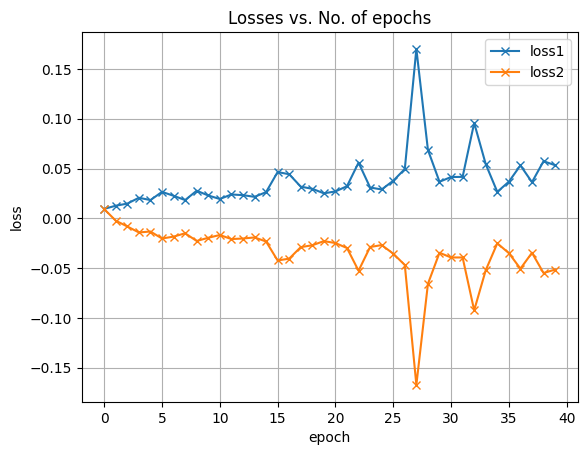

In [34]:
plot_history(history)

In [ ]:
# /home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints


In [37]:
print(model)

UsadModel(
  (encoder): Encoder(
    (linear1): Linear(in_features=72, out_features=36, bias=True)
    (linear2): Linear(in_features=36, out_features=18, bias=True)
    (linear3): Linear(in_features=18, out_features=9, bias=True)
    (relu): ReLU(inplace=True)
  )
  (decoder1): Decoder(
    (linear1): Linear(in_features=9, out_features=18, bias=True)
    (linear2): Linear(in_features=18, out_features=36, bias=True)
    (linear3): Linear(in_features=36, out_features=72, bias=True)
    (relu): ReLU(inplace=True)
    (sigmoid): Sigmoid()
  )
  (decoder2): Decoder(
    (linear1): Linear(in_features=9, out_features=18, bias=True)
    (linear2): Linear(in_features=18, out_features=36, bias=True)
    (linear3): Linear(in_features=36, out_features=72, bias=True)
    (relu): ReLU(inplace=True)
    (sigmoid): Sigmoid()
  )
)


In [35]:
torch.save({
            #'epoch': N_EPOCHS,
            #'model': model.state_dict(),
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_40epochs_multivariate.pth")

In [129]:
checkpoint = torch.load("/home/medoro/Unsupervised_Anomaly_Detection_thesis/checkpoints/model_40epochs_univariate.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [130]:
X_test, y_test = create_train_eval_sequences(test, train_window)

In [131]:
X_test.shape, y_test.shape

((331056, 72, 1), (331056, 72))

In [132]:
test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(X_test).float().contiguous().view(([X_test.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [133]:
results=testing(model,test_loader) #Prova con il test set

In [153]:
results, w1, w2 = testing_prova(model, test_loader)

In [154]:
results

[tensor([0.0458, 0.0463, 0.0467, 0.0469, 0.0470, 0.0471, 0.0471, 0.0471, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472, 0.0472,
         0.0472, 0.0472, 0.0

In [155]:
w1

[tensor([[0.2318, 0.1954, 0.2057,  ..., 0.1000, 0.1268, 0.1425],
         [0.2258, 0.1902, 0.2006,  ..., 0.0970, 0.1234, 0.1388],
         [0.2226, 0.1875, 0.1979,  ..., 0.0955, 0.1218, 0.1370],
         ...,
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349]],
        device='cuda:0'),
 tensor([[0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
         ...,
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349]],
        device='cuda:0'),
 tensor([[0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
         [0.2184, 0.1842, 0.1945,  ..., 0.0936, 0.1200, 0.1349],
        

In [156]:
w2

[tensor([[0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         ...,
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411]],
        device='cuda:0'),
 tensor([[0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         ...,
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411]],
        device='cuda:0'),
 tensor([[0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
        

In [74]:
len(test_loader)

2587

In [75]:
batches = []
for [batch] in test_loader:
    batches.append(batch)
batches

[tensor([[0.3504, 0.0000, 0.0000,  ..., 0.8019, 0.0990, 0.0000],
         [0.2448, 0.8286, 0.0000,  ..., 1.0000, 0.5000, 0.0000],
         [0.1919, 0.8190, 0.0000,  ..., 1.0000, 0.5000, 0.0000],
         ...,
         [0.1391, 0.8714, 0.3569,  ..., 0.3569, 0.0000, 0.0000],
         [0.1391, 0.8778, 0.3569,  ..., 0.3569, 0.0000, 0.0000],
         [0.1391, 0.8778, 0.3569,  ..., 0.3569, 0.0000, 0.0000]]),
 tensor([[0.1391, 0.8810, 0.3569,  ..., 0.3569, 0.0000, 0.0000],
         [0.1391, 0.8889, 0.3569,  ..., 0.3569, 0.0000, 0.0000],
         [0.1391, 0.8937, 0.3569,  ..., 0.3569, 0.0000, 0.0000],
         ...,
         [0.1391, 0.8619, 1.0000,  ..., 0.0000, 0.7225, 0.0000],
         [0.1391, 0.8492, 1.0000,  ..., 0.0000, 0.7225, 0.0000],
         [0.1391, 0.8413, 1.0000,  ..., 0.0000, 0.7225, 0.0000]]),
 tensor([[0.1391, 0.8397, 1.0000,  ..., 0.0000, 0.7225, 0.0000],
         [0.1391, 0.8444, 1.0000,  ..., 0.0000, 0.7225, 0.0000],
         [0.1391, 0.8524, 1.0000,  ..., 0.0000, 0.7225, 0.

In [76]:
len(w1)

2587

In [77]:
len(w2)

2587

In [78]:
len(w1[1]), len(w1[-1])

(128, 48)

In [79]:
len(w2[1]), len(w2[-1])

(128, 48)

In [80]:
w2

[tensor([[4.9193e-01, 6.6698e-01, 1.9938e-01,  ..., 7.0902e-01, 3.0213e-01,
          1.8321e-02],
         [4.9193e-01, 6.6698e-01, 1.9938e-01,  ..., 7.0902e-01, 3.0212e-01,
          1.8320e-02],
         [4.9195e-01, 6.6698e-01, 1.9933e-01,  ..., 7.0903e-01, 3.0197e-01,
          1.8319e-02],
         ...,
         [5.6066e-01, 6.7679e-01, 7.3050e-01,  ..., 2.9889e-02, 2.7517e-01,
          3.5296e-04],
         [5.0087e-01, 6.6530e-01, 2.6519e-01,  ..., 6.3151e-01, 2.8217e-01,
          1.5637e-02],
         [4.9149e-01, 6.6706e-01, 2.0060e-01,  ..., 7.0876e-01, 3.0579e-01,
          1.8354e-02]], device='cuda:0'),
 tensor([[0.4912, 0.6671, 0.2013,  ..., 0.7086, 0.3079, 0.0184],
         [0.4913, 0.6671, 0.2012,  ..., 0.7086, 0.3076, 0.0184],
         [0.4913, 0.6671, 0.2012,  ..., 0.7086, 0.3076, 0.0184],
         ...,
         [0.4148, 0.6680, 0.9878,  ..., 0.0395, 0.8989, 0.0190],
         [0.4154, 0.6679, 0.9875,  ..., 0.0400, 0.8968, 0.0190],
         [0.4162, 0.6678, 0.9870, 

In [81]:
w1

[tensor([[4.6237e-01, 6.4994e-01, 1.9445e-01,  ..., 8.8643e-01, 5.4790e-01,
          8.6416e-02],
         [4.6234e-01, 6.4992e-01, 1.9445e-01,  ..., 8.8636e-01, 5.4764e-01,
          8.6450e-02],
         [4.6176e-01, 6.4970e-01, 1.9450e-01,  ..., 8.8512e-01, 5.4346e-01,
          8.7011e-02],
         ...,
         [5.2537e-01, 6.5218e-01, 6.5135e-01,  ..., 1.1864e-01, 5.1003e-02,
          4.9986e-05],
         [5.2302e-01, 6.5677e-01, 5.2445e-01,  ..., 2.1576e-01, 4.5462e-02,
          1.6235e-04],
         [5.1994e-01, 6.6159e-01, 3.8403e-01,  ..., 3.7302e-01, 4.0414e-02,
          5.8167e-04]], device='cuda:0'),
 tensor([[5.0944e-01, 6.6417e-01, 2.7328e-01,  ..., 5.3374e-01, 4.0468e-02,
          1.8869e-03],
         [4.8401e-01, 6.6117e-01, 2.2161e-01,  ..., 6.0478e-01, 5.2715e-02,
          4.1978e-03],
         [4.8499e-01, 6.6143e-01, 2.1982e-01,  ..., 6.0927e-01, 5.1841e-02,
          4.3076e-03],
         ...,
         [3.8126e-01, 6.9063e-01, 1.0000e+00,  ..., 2.1972e-11

In [157]:
import torch.nn.functional as F

In [158]:
last = w1[-1]

In [42]:
last

tensor([[0.3253, 0.3183, 0.3132,  ..., 0.3475, 0.3500, 0.3478],
        [0.3249, 0.3180, 0.3130,  ..., 0.3476, 0.3503, 0.3481],
        [0.3247, 0.3178, 0.3130,  ..., 0.3476, 0.3504, 0.3484],
        ...,
        [0.3270, 0.3185, 0.3124,  ..., 0.3479, 0.3513, 0.3494],
        [0.3280, 0.3196, 0.3135,  ..., 0.3471, 0.3504, 0.3487],
        [0.3291, 0.3206, 0.3144,  ..., 0.3466, 0.3499, 0.3481]],
       device='cuda:0')

In [159]:
last2 = w2[-1]
last2, last2.size()

(tensor([[0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         ...,
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
         [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411]],
        device='cuda:0'),
 torch.Size([48, 72]))

In [160]:
last.size()

torch.Size([48, 72])

In [161]:
len(last)

48

In [162]:
padded_last = F.pad(last, (0, 0, 0, 128-48))
padded_last

tensor([[0.3696, 0.3474, 0.3584,  ..., 0.2557, 0.2822, 0.2990],
        [0.3694, 0.3474, 0.3584,  ..., 0.2559, 0.2825, 0.2992],
        [0.3694, 0.3475, 0.3585,  ..., 0.2562, 0.2827, 0.2994],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [163]:
padded_last2 = F.pad(last2, (0, 0, 0, 128-48))
padded_last2

tensor([[0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
        [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
        [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [164]:
len(padded_last[47])

72

In [165]:
len(w1[:-1])

2586

In [166]:
new_lista = w1[:-1]
new_lista.append(padded_last)

In [167]:
new_lista2 = w2[:-1]
new_lista2.append(padded_last2)

In [168]:
res_w1 = torch.cat(new_lista, dim=0)
res_w1

tensor([[0.2318, 0.1954, 0.2057,  ..., 0.1000, 0.1268, 0.1425],
        [0.2258, 0.1902, 0.2006,  ..., 0.0970, 0.1234, 0.1388],
        [0.2226, 0.1875, 0.1979,  ..., 0.0955, 0.1218, 0.1370],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [169]:
res_w2 = torch.cat(new_lista2, dim=0)
res_w2

tensor([[0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
        [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
        [0.4419, 0.4419, 0.4419,  ..., 0.4409, 0.4410, 0.4411],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [170]:
res_w1.size() # Need to eliminate last 128-48 = 80 rows (padded before) #42

torch.Size([331136, 72])

In [171]:
res_w2.size()

torch.Size([331136, 72])

In [172]:
original_rec = res_w1[:-80]

In [173]:
original_rec2 = res_w2[:-80]

In [174]:
original_rec.size()

torch.Size([331056, 72])

In [175]:
original_rec2.size()

torch.Size([331056, 72])

In [176]:
origin_rec = original_rec.detach().cpu().numpy()
origin_rec

array([[0.23178165, 0.19536982, 0.20573953, ..., 0.10001886, 0.12678115,
        0.14251412],
       [0.22579637, 0.19018653, 0.20060982, ..., 0.09697659, 0.12338679,
        0.13880745],
       [0.22259553, 0.18752317, 0.19792925, ..., 0.09545424, 0.12179299,
        0.13701493],
       ...,
       [0.3771182 , 0.35753855, 0.36785254, ..., 0.27197498, 0.29751554,
        0.31313032],
       [0.37687024, 0.35743818, 0.36775956, ..., 0.27212888, 0.2976881 ,
        0.31325343],
       [0.37674713, 0.35742855, 0.367751  , ..., 0.272326  , 0.2978916 ,
        0.3134169 ]], dtype=float32)

In [177]:
origin_rec2 = original_rec2.detach().cpu().numpy()
origin_rec2

array([[0.4419211 , 0.44191447, 0.4419354 , ..., 0.44090363, 0.44102636,
        0.44114646],
       [0.4419211 , 0.44191447, 0.4419354 , ..., 0.44090363, 0.44102636,
        0.44114646],
       [0.4419211 , 0.44191447, 0.4419354 , ..., 0.44090363, 0.44102636,
        0.44114646],
       ...,
       [0.4419211 , 0.44191447, 0.4419354 , ..., 0.44090363, 0.44102636,
        0.44114646],
       [0.4419211 , 0.44191447, 0.4419354 , ..., 0.44090363, 0.44102636,
        0.44114646],
       [0.4419211 , 0.44191447, 0.4419354 , ..., 0.44090363, 0.44102636,
        0.44114646]], dtype=float32)

In [178]:
origin_rec.shape

(331056, 72)

In [179]:
origin_rec2.shape

(331056, 72)

In [180]:
# Define a function to revert the sliding window application
def reconstruction_windows(timeseries):
  """
  This function takes as input the windows regarding a single time series in the original dataset.
  Input: timeseries.shape = (8713, 72), where 72 = window_size, 8713 = number_of_windows = 24*366 - window_size + 1
  Output: media.shape = (24*366, 1) ---> meter_reading column reconstructed, by averaging the reconstructions for the same points
  """
  df_x_train = pd.DataFrame(np.squeeze(timeseries))
  transposed_df = df_x_train.T
  nan_rows = np.full((8784-transposed_df.shape[0],transposed_df.shape[1]),np.nan)
  rows = pd.DataFrame(nan_rows)
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
  for i in range(0, transposed_df.shape[1]):
    col = transposed_df.iloc[:, i].shift(i)
    transposed_df.iloc[:, i] = col
  retransposed = transposed_df.T
  media = np.nanmean(retransposed, axis = 0)
  return media

def apply_reconstruction(dataframe, n_timeseries):
  # Take the entire dataframe
  squeezed_df = np.squeeze(dataframe)
  # Reshape it: ex. train (162, 8713, 72) ---> 162 = number of timeseries in the dataframe
  reshaped = np.reshape(squeezed_df, (n_timeseries, 8712, 72)) #8713
  reconstruction = []
  i = 0
  for timeseries in reshaped:
    # Reconstruct separately each timeseries
    print(i)
    average_reconstruction = reconstruction_windows(timeseries)
    reconstruction.append(average_reconstruction)
    i = i+1
  final_reconstruction = np.squeeze(reconstruction)
  fr = np.reshape(final_reconstruction, (n_timeseries*8784, 1))
  return fr

In [181]:
reconstruction = apply_reconstruction(origin_rec, test.building_id.nunique())

0


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


1


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


2


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


3


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


4


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


5


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


6


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


7


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


8


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


9


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


10


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


11


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


12


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


13


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


14


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


15


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


16


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


17


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


18


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


19


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


20


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


21


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


22


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


23


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


24


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


25


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


26


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


27


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


28


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


29


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


30


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


31


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


32


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


33


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


34


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


35


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


36


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


37


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


In [182]:
reconstruction2 = apply_reconstruction(origin_rec2, test.building_id.nunique())

0


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


1


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


2


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


3


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


4


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


5


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


6


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


7


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


8


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


9


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


10


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


11


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


12


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


13


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


14


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


15


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


16


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


17


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


18


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


19


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


20


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


21


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


22


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


23


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


24


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


25


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


26


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


27


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


28


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


29


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


30


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


31


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


32


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


33


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


34


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


35


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


36


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


37


/tmp/ipykernel_16779/1893028571.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transposed_df = pd.concat([transposed_df, rows], ignore_index = True) #transposed_df.append(rows, ignore_index = True)
/tmp/ipykernel_16779/1893028571.py:17: RuntimeWarning: Mean of empty slice
  media = np.nanmean(retransposed, axis = 0)


In [183]:
scaler = MinMaxScaler(feature_range=(0,1))

In [184]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading']]=scaler.fit_transform(gdf[['meter_reading']])
  dfs_dict_1[building_id] = gdf
predicted_df_test = pd.concat(dfs_dict_1.values())

In [185]:
predicted_df_test['reconstruction'] = reconstruction

In [186]:
predicted_df_test['reconstruction2'] = reconstruction2

In [187]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.231782   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.210583   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.206174   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.213795   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.217762   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.285772   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.294381   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.305573   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.313417   
2016-12-31 23:00:00        5  -0.974928  -0.222521             NaN   

                     reconstruction2  
2016-01-01 00:00:00         0.441921  
2016-01-01 01:00:00         0.441918  
2016-01-01 02:00:00         0.441924  
2016-01-01 03:00:00         0.441955  
2016-01-01 04:00:00         0.442012  
...                              ...  
2016-12-31 19:00:00         0.441001  
2016-12-31 20:00:00         0.441025  
2016-12-31 21:00:00         0.441086  
2016-12-31 22:00:00         0.441146  
2016-12-31 23:00:00              NaN  

[333792 rows x 11 columns]

In [ ]:
#result = [None if np.isnan(el) == True else el for el in readings]

In [188]:
predicted_df_test['reconstruction']=predicted_df_test['reconstruction'].replace(np.nan,0)

In [189]:
predicted_df_test['reconstruction2']=predicted_df_test['reconstruction2'].replace(np.nan,0)

In [190]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.231782   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.210583   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.206174   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.213795   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.217762   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.285772   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.294381   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.305573   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.313417   
2016-12-31 23:00:00        5  -0.974928  -0.222521        0.000000   

                     reconstruction2  
2016-01-01 00:00:00         0.441921  
2016-01-01 01:00:00         0.441918  
2016-01-01 02:00:00         0.441924  
2016-01-01 03:00:00         0.441955  
2016-01-01 04:00:00         0.442012  
...                              ...  
2016-12-31 19:00:00         0.441001  
2016-12-31 20:00:00         0.441025  
2016-12-31 21:00:00         0.441086  
2016-12-31 22:00:00         0.441146  
2016-12-31 23:00:00         0.000000  

[333792 rows x 11 columns]

In [191]:
predicted_df_test.reconstruction2.min(), predicted_df_test.reconstruction2.max()

(0.0, 0.4427369)

In [192]:
predicted_df_test['relative_loss'] = np.abs((predicted_df_test['reconstruction']-predicted_df_test['meter_reading'])/predicted_df_test['reconstruction'])

In [193]:
predicted_df_test['relative_loss2'] = np.abs((predicted_df_test['reconstruction2']-predicted_df_test['meter_reading'])/predicted_df_test['reconstruction2'])

In [194]:
#calculate threshold on relative loss quartiles but only on val, and in this case per building
thresholds=np.array([])
for building_id, gdf in predicted_df_test.groupby("building_id"):
  val_mre_loss_building= gdf['relative_loss'].values
  building_threshold = (np.percentile(val_mre_loss_building, 75)) + 1.5 *((np.percentile(val_mre_loss_building, 75))-(np.percentile(val_mre_loss_building, 25)))
  gdf['threshold']=building_threshold
  thresholds= np.append(thresholds, gdf['threshold'].values)
print(thresholds.shape)
predicted_df_test['threshold']= thresholds

(333792,)


In [195]:
#calculate threshold on relative loss quartiles but only on val, and in this case per building
thresholds=np.array([])
for building_id, gdf in predicted_df_test.groupby("building_id"):
  val_mre_loss_building= gdf['relative_loss2'].values
  building_threshold = (np.percentile(val_mre_loss_building, 75)) + 1.5 *((np.percentile(val_mre_loss_building, 75))-(np.percentile(val_mre_loss_building, 25)))
  gdf['threshold2']=building_threshold
  thresholds= np.append(thresholds, gdf['threshold2'].values)
print(thresholds.shape)
predicted_df_test['threshold2']= thresholds

(333792,)


In [196]:
predicted_df_test

building_id                    primary_use  \
2016-01-01 00:00:00           69                        Parking   
2016-01-01 01:00:00           69                        Parking   
2016-01-01 02:00:00           69                        Parking   
2016-01-01 03:00:00           69                        Parking   
2016-01-01 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-01 00:00:00       0.350417               967.2           1        0   
2016-01-01 01:00:00       0.244752              1019.4           1        0   
2016-01-01 02:00:00       0.191920              1018.8           1        0   
2016-01-01 03:00:00       0.165504              1018.1           1        0   
2016-01-01 04:00:00       0.152296              1019.0           1        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511               967.2           0        0   
2016-12-31 20:00:00       0.336511               967.2           0        0   
2016-12-31 21:00:00       0.336511               967.2           0        0   
2016-12-31 22:00:00       0.336511               967.2           0        0   
2016-12-31 23:00:00       0.336511               967.2           0        0   

                     weekday  weekday_y  weekday_x  reconstruction  \
2016-01-01 00:00:00        4  -0.433884  -0.900969        0.231782   
2016-01-01 01:00:00        4  -0.433884  -0.900969        0.210583   
2016-01-01 02:00:00        4  -0.433884  -0.900969        0.206174   
2016-01-01 03:00:00        4  -0.433884  -0.900969        0.213795   
2016-01-01 04:00:00        4  -0.433884  -0.900969        0.217762   
...                      ...        ...        ...             ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521        0.285772   
2016-12-31 20:00:00        5  -0.974928  -0.222521        0.294381   
2016-12-31 21:00:00        5  -0.974928  -0.222521        0.305573   
2016-12-31 22:00:00        5  -0.974928  -0.222521        0.313417   
2016-12-31 23:00:00        5  -0.974928  -0.222521        0.000000   

                     reconstruction2  relative_loss  relative_loss2  \
2016-01-01 00:00:00         0.441921       0.511840        0.207060   
2016-01-01 01:00:00         0.441918       0.162260        0.446159   
2016-01-01 02:00:00         0.441924       0.069134        0.565716   
2016-01-01 03:00:00         0.441955       0.225873        0.625518   
2016-01-01 04:00:00         0.442012       0.300629        0.655448   
...                              ...            ...             ...   
2016-12-31 19:00:00         0.441001       0.177551        0.236939   
2016-12-31 20:00:00         0.441025       0.143111        0.236981   
2016-12-31 21:00:00         0.441086       0.101247        0.237087   
2016-12-31 22:00:00         0.441146       0.073684        0.237191   
2016-12-31 23:00:00         0.000000            inf             inf   

                     threshold  threshold2  
2016-01-01 00:00:00   1.065123    1.364280  
2016-01-01 01:00:00   1.065123    1.364280  
2016-01-01 02:00:00   1.065123    1.364280  
2016-01-01 03:00:00   1.065123    1.364280  
2016-01-01 04:00:00   1.065123    1.364280  
...                        ...         ...  
2016-12-31 19:00:00   0.257758    0.692655  
2016-12-31 20:00:00   0.257758    0.692655  
2016-12-31 21:00:00   0.257758    0.692655  
2016-12-31 22:00:00   0.257758    0.692655  
2016-12-31 23:00:00   0.257758    0.692655  

[333792 rows x 15 columns]

In [197]:
predicted_df_test['predicted_anomaly'] = predicted_df_test['relative_loss'] > predicted_df_test['threshold']
predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(False,0)
predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(True,1)

/tmp/ipykernel_16779/2648773490.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df_test['predicted_anomaly']=predicted_df_test['predicted_anomaly'].replace(True,1)


In [198]:
predicted_df_test['predicted_anomaly2'] = predicted_df_test['relative_loss2'] > predicted_df_test['threshold2']
predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(False,0)
predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(True,1)

/tmp/ipykernel_16779/3307754308.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df_test['predicted_anomaly2']=predicted_df_test['predicted_anomaly2'].replace(True,1)


In [199]:
predicted_df_test.index.names=['timestamp']
predicted_df_test= predicted_df_test.reset_index()

In [200]:
predicted_df_test.predicted_anomaly.unique()

array([0, 1])

In [201]:
predicted_df_test.predicted_anomaly2.unique()

array([0, 1])

In [202]:
predicted_anomalies = predicted_df_test.loc[predicted_df_test['predicted_anomaly'] == 1]
predicted_anomalies2 = predicted_df_test.loc[predicted_df_test['predicted_anomaly2'] == 1]
true_anomalies = predicted_df_test.loc[predicted_df_test['anomaly'] == 1]

In [203]:
predicted_df_test = pd.merge(predicted_df_test, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [204]:
print(classification_report(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    324574
           1       0.27      0.47      0.35      7767

    accuracy                           0.96    332341
   macro avg       0.63      0.72      0.66    332341
weighted avg       0.97      0.96      0.96    332341



In [205]:
print(classification_report(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly2']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    324574
           1       0.37      0.30      0.33      7767

    accuracy                           0.97    332341
   macro avg       0.68      0.64      0.66    332341
weighted avg       0.97      0.97      0.97    332341



In [206]:
roc_auc_score(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly'])

0.719627219619851

In [207]:
roc_auc_score(predicted_df_test['anomaly'], predicted_df_test['predicted_anomaly2'])

0.6444791201961418

In [92]:
predicted_df_test.building_id.unique()

array([  69,   79,  119,  139,  144,  149,  159,  174,  254,  439,  534,
        729,  739,  844,  879,  884,  889,  894,  909,  914,  919,  924,
        929,  969,  974,  994, 1074, 1219, 1234, 1239, 1249, 1259, 1264,
       1279, 1284, 1304, 1309, 1319])

In [210]:
visualizations = predicted_df_test[predicted_df_test.building_id == 1234]
visualizations

timestamp  building_id primary_use  meter_reading  \
244501 2016-01-01 00:00:00         1234   Education       0.371082   
244502 2016-01-01 01:00:00         1234   Education       0.376194   
244503 2016-01-01 02:00:00         1234   Education       0.371082   
244504 2016-01-01 03:00:00         1234   Education       0.284153   
244505 2016-01-01 04:00:00         1234   Education       0.279041   
...                    ...          ...         ...            ...   
253280 2016-12-31 19:00:00         1234   Education       0.233020   
253281 2016-12-31 20:00:00         1234   Education       0.233020   
253282 2016-12-31 21:00:00         1234   Education       0.233020   
253283 2016-12-31 22:00:00         1234   Education       0.273929   
253284 2016-12-31 23:00:00         1234   Education       0.268817   

        sea_level_pressure  is_holiday  anomaly  weekday  weekday_y  \
244501              1018.9           1        0        4  -0.433884   
244502              1018.4           1        0        4  -0.433884   
244503              1018.2           1        0        4  -0.433884   
244504              1018.3           1        0        4  -0.433884   
244505              1018.2           1        0        4  -0.433884   
...                    ...         ...      ...      ...        ...   
253280               967.2           0        0        5  -0.974928   
253281               967.2           0        0        5  -0.974928   
253282               967.2           0        0        5  -0.974928   
253283               967.2           0        0        5  -0.974928   
253284               967.2           0        0        5  -0.974928   

        weekday_x  reconstruction  reconstruction2  relative_loss  \
244501  -0.900969        0.381671         0.441921       0.027744   
244502  -0.900969        0.365511         0.441918       0.029228   
244503  -0.900969        0.361661         0.441924       0.026049   
244504  -0.900969        0.364614         0.441955       0.220676   
244505  -0.900969        0.365574         0.442012       0.236705   
...           ...             ...              ...            ...   
253280  -0.222521        0.230005         0.441001       0.013109   
253281  -0.222521        0.237920         0.441025       0.020594   
253282  -0.222521        0.248885         0.441086       0.063746   
253283  -0.222521        0.256342         0.441146       0.068607   
253284  -0.222521        0.000000         0.000000            inf   

        relative_loss2  threshold  threshold2  predicted_anomaly  \
244501        0.160298   0.508516     0.81054                  0   
244502        0.148723   0.508516     0.81054                  0   
244503        0.160302   0.508516     0.81054                  0   
244504        0.357055   0.508516     0.81054                  0   
244505        0.368704   0.508516     0.81054                  0   
...                ...        ...         ...                ...   
253280        0.471611   0.508516     0.81054                  0   
253281        0.471641   0.508516     0.81054                  0   
253282        0.471714   0.508516     0.81054                  0   
253283        0.379053   0.508516     0.81054                  0   
253284             inf   0.508516     0.81054                  1   

        predicted_anomaly2  
244501                   0  
244502                   0  
244503                   0  
244504                   0  
244505                   0  
...                    ...  
253280                   0  
253281                   0  
253282                   0  
253283                   0  
253284                   1  

[8784 rows x 18 columns]

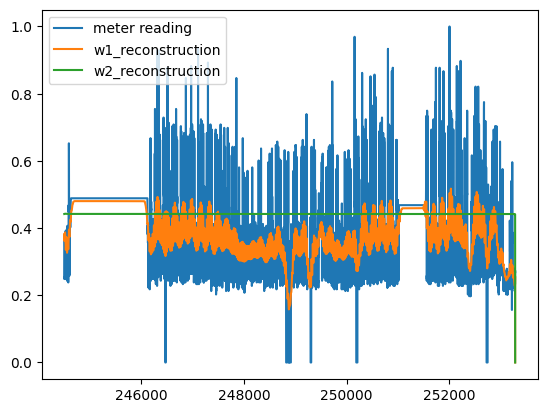

In [211]:
plt.plot(visualizations.meter_reading, label = "meter reading") #predicted_df_test.meter_reading[:8784]
plt.plot(visualizations.reconstruction, label = "w1_reconstruction")
plt.plot(visualizations.reconstruction2, label = "w2_reconstruction")
plt.legend()
plt.show()

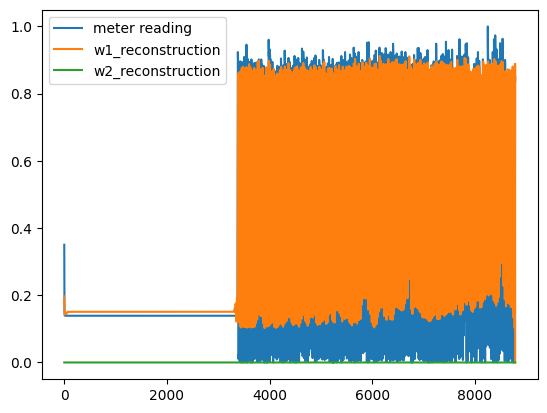

In [211]:
plt.plot(predicted_df_test.meter_reading[:8784], label = "meter reading")
plt.plot(predicted_df_test.reconstruction[:8784], label = "w1_reconstruction")
plt.plot(predicted_df_test.reconstruction2[:8784], label = "w2_reconstruction")
plt.legend()
plt.show()

In [ ]:
predicted_anomalies = predicted_df_test.loc[predicted_df_test['predicted_anomaly'] == 1]
true_anomalies = predicted_df_test.loc[predicted_df_test['anomaly'] == 1]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predicted_df_test.index, y=predicted_df_test['meter_reading'], name='meter readings'))
fig.add_trace(go.Scatter(x=predicted_df_test.index, y=predicted_df_test['reconstruction'], name='meter readings reconstructed'))

fig.add_trace(go.Scatter(x=true_anomalies['timestamp'], y=true_anomalies['meter_reading'], mode='markers', marker=dict(color='forestgreen'), name='True_Anomaly'))
fig.update_layout(showlegend=True, title='meter readings predicted and anomalies - val')
fig.show()

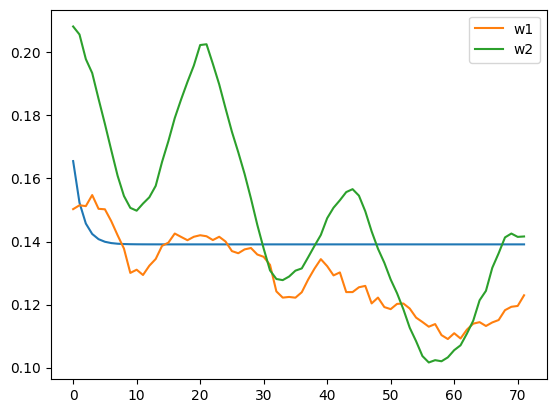

In [56]:
plt.plot(batches[0][3])
plt.plot(w1[0][3].cpu(), label = "w1")
plt.plot(w2[0][3].cpu(), label = "w2")
plt.legend()
plt.show()

In [44]:
len(results), len(results[0])

(2587, 128)

In [45]:
results[-1]

tensor([0.0075, 0.0074, 0.0074, 0.0074, 0.0073, 0.0073, 0.0072, 0.0072, 0.0072,
        0.0071, 0.0071, 0.0071, 0.0071, 0.0070, 0.0070, 0.0071, 0.0071, 0.0071,
        0.0072, 0.0072, 0.0073, 0.0073, 0.0074, 0.0074, 0.0074, 0.0073, 0.0073,
        0.0072, 0.0071, 0.0071, 0.0070, 0.0069, 0.0069, 0.0068, 0.0068, 0.0068,
        0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0067, 0.0066, 0.0066,
        0.0066, 0.0066, 0.0066], device='cuda:0')

In [45]:
(len(results)-1) * len(results[0]) + len(results[-1])

331094

In [46]:
len(test.anomaly)

333792

Let's create the dataset to perform predictions.

In [134]:
scaler = MinMaxScaler(feature_range=(0,1))

In [135]:
dfs_dict_1 = {}
for building_id, gdf in test.groupby("building_id"):
  gdf[['meter_reading', 'sea_level_pressure']]=scaler.fit_transform(gdf[['meter_reading', 'sea_level_pressure']])
  dfs_dict_1[building_id] = gdf[train_window:]
predicted_df = pd.concat(dfs_dict_1.values())

In [136]:
lista = []
for el in results:
  for el2 in el:
    lista.append(el2.cpu().item())

In [137]:
lista

[0.04579738900065422,
 0.046290211379528046,
 0.04667914658784866,
 0.046906836330890656,
 0.04702964052557945,
 0.047093287110328674,
 0.04712566360831261,
 0.04714199900627136,
 0.047150205820798874,
 0.04715431481599808,
 0.04715637117624283,
 0.047157399356365204,
 0.04715791344642639,
 0.047158170491456985,
 0.04715829715132713,
 0.047158364206552505,
 0.04715839400887489,
 0.047158412635326385,
 0.04715842381119728,
 0.04715842381119728,
 0.04715842381119728,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0.04715842753648758,
 0

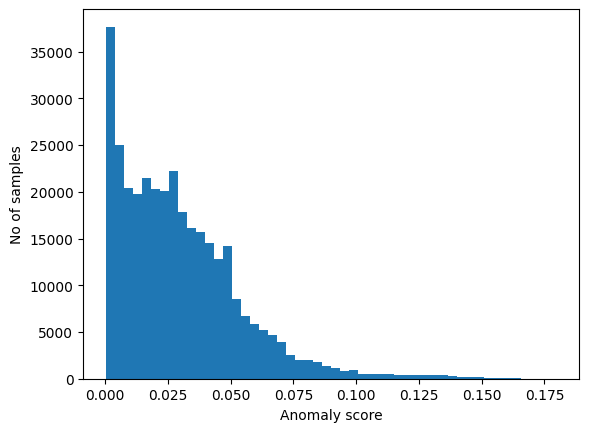

In [138]:
plt.hist(lista, bins=50)
plt.xlabel("Anomaly score")
plt.ylabel("No of samples")
plt.show()

In [139]:
predicted_df['predictions'] = lista

In [140]:
predicted_df

building_id                    primary_use  \
2016-01-04 00:00:00           69                        Parking   
2016-01-04 01:00:00           69                        Parking   
2016-01-04 02:00:00           69                        Parking   
2016-01-04 03:00:00           69                        Parking   
2016-01-04 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-04 00:00:00       0.139088            0.757143           0        0   
2016-01-04 01:00:00       0.139088            0.760317           0        0   
2016-01-04 02:00:00       0.139088            0.746032           0        0   
2016-01-04 03:00:00       0.139088            0.742857           0        0   
2016-01-04 04:00:00       0.139088            0.738095           0        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511            0.000000           0        0   
2016-12-31 20:00:00       0.336511            0.000000           0        0   
2016-12-31 21:00:00       0.336511            0.000000           0        0   
2016-12-31 22:00:00       0.336511            0.000000           0        0   
2016-12-31 23:00:00       0.336511            0.000000           0        0   

                     weekday  weekday_y  weekday_x  predictions  
2016-01-04 00:00:00        0   0.000000   1.000000     0.045797  
2016-01-04 01:00:00        0   0.000000   1.000000     0.046290  
2016-01-04 02:00:00        0   0.000000   1.000000     0.046679  
2016-01-04 03:00:00        0   0.000000   1.000000     0.046907  
2016-01-04 04:00:00        0   0.000000   1.000000     0.047030  
...                      ...        ...        ...          ...  
2016-12-31 19:00:00        5  -0.974928  -0.222521     0.007354  
2016-12-31 20:00:00        5  -0.974928  -0.222521     0.007304  
2016-12-31 21:00:00        5  -0.974928  -0.222521     0.007249  
2016-12-31 22:00:00        5  -0.974928  -0.222521     0.007187  
2016-12-31 23:00:00        5  -0.974928  -0.222521     0.007120  

[331056 rows x 10 columns]

In [141]:
predicted_df.predictions.min(), predicted_df.predictions.max() #Ricorda: non sono vere e proprie predizioni, si tratta dell'anomaly score

(0.00021257121989037842, 0.17982488870620728)

In [142]:
perc = 90
threshold = (np.percentile(predicted_df.predictions.values, perc))

In [143]:
threshold

0.0605031531304121

In [144]:
predicted_df['threshold'] = threshold

In [145]:
predicted_df['predicted_anomaly'] = predicted_df.predictions > predicted_df['threshold']#anomalies #predicted_df['threshold']#
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(False,0)
predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)

/tmp/ipykernel_16779/3264709519.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predicted_df['predicted_anomaly']=predicted_df['predicted_anomaly'].replace(True,1)


In [146]:
predicted_df

building_id                    primary_use  \
2016-01-04 00:00:00           69                        Parking   
2016-01-04 01:00:00           69                        Parking   
2016-01-04 02:00:00           69                        Parking   
2016-01-04 03:00:00           69                        Parking   
2016-01-04 04:00:00           69                        Parking   
...                          ...                            ...   
2016-12-31 19:00:00         1319  Entertainment/public assembly   
2016-12-31 20:00:00         1319  Entertainment/public assembly   
2016-12-31 21:00:00         1319  Entertainment/public assembly   
2016-12-31 22:00:00         1319  Entertainment/public assembly   
2016-12-31 23:00:00         1319  Entertainment/public assembly   

                     meter_reading  sea_level_pressure  is_holiday  anomaly  \
2016-01-04 00:00:00       0.139088            0.757143           0        0   
2016-01-04 01:00:00       0.139088            0.760317           0        0   
2016-01-04 02:00:00       0.139088            0.746032           0        0   
2016-01-04 03:00:00       0.139088            0.742857           0        0   
2016-01-04 04:00:00       0.139088            0.738095           0        0   
...                            ...                 ...         ...      ...   
2016-12-31 19:00:00       0.336511            0.000000           0        0   
2016-12-31 20:00:00       0.336511            0.000000           0        0   
2016-12-31 21:00:00       0.336511            0.000000           0        0   
2016-12-31 22:00:00       0.336511            0.000000           0        0   
2016-12-31 23:00:00       0.336511            0.000000           0        0   

                     weekday  weekday_y  weekday_x  predictions  threshold  \
2016-01-04 00:00:00        0   0.000000   1.000000     0.045797   0.060503   
2016-01-04 01:00:00        0   0.000000   1.000000     0.046290   0.060503   
2016-01-04 02:00:00        0   0.000000   1.000000     0.046679   0.060503   
2016-01-04 03:00:00        0   0.000000   1.000000     0.046907   0.060503   
2016-01-04 04:00:00        0   0.000000   1.000000     0.047030   0.060503   
...                      ...        ...        ...          ...        ...   
2016-12-31 19:00:00        5  -0.974928  -0.222521     0.007354   0.060503   
2016-12-31 20:00:00        5  -0.974928  -0.222521     0.007304   0.060503   
2016-12-31 21:00:00        5  -0.974928  -0.222521     0.007249   0.060503   
2016-12-31 22:00:00        5  -0.974928  -0.222521     0.007187   0.060503   
2016-12-31 23:00:00        5  -0.974928  -0.222521     0.007120   0.060503   

                     predicted_anomaly  
2016-01-04 00:00:00                  0  
2016-01-04 01:00:00                  0  
2016-01-04 02:00:00                  0  
2016-01-04 03:00:00                  0  
2016-01-04 04:00:00                  0  
...                                ...  
2016-12-31 19:00:00                  0  
2016-12-31 20:00:00                  0  
2016-12-31 21:00:00                  0  
2016-12-31 22:00:00                  0  
2016-12-31 23:00:00                  0  

[331056 rows x 12 columns]

In [147]:
predicted_df.predicted_anomaly.unique()

array([0, 1])

In [148]:
len(predicted_df[predicted_df.predicted_anomaly == 1])/len(predicted_df)

0.10000120825479678

In [149]:
predicted_df.index.names=['timestamp']
predicted_df= predicted_df.reset_index()

In [150]:
predicted_df = pd.merge(predicted_df, df[['timestamp','building_id']], on=['timestamp','building_id'])

In [151]:
print(classification_report(predicted_df.anomaly, predicted_df.predicted_anomaly))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    322044
           1       0.06      0.25      0.09      7635

    accuracy                           0.89    329679
   macro avg       0.52      0.57      0.52    329679
weighted avg       0.96      0.89      0.92    329679



In [152]:
roc_auc_score(predicted_df['anomaly'], predicted_df['predicted_anomaly'])

0.5742399585223061